In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='mae', optimizer="adam")
model.summary()
history_9 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale))


read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

In [3]:
##for 0.1 lr
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate 0.1
#
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mae', optimizer=opt)
model.summary()

history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale))


read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

In [4]:
##for 0.01
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mae', optimizer=opt)

model.summary()

history_2 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale))



read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

In [5]:
##for 0.001
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mae', optimizer=opt)

model.summary()

history_3 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale))

read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

In [6]:
##for 0.0001
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer=opt)
model.summary()

history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale))


read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

In [7]:
##for lr scheduler 5epochs
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_5 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])



read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

In [8]:
##for for lr scheduler 10epochs
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_6 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])




read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

In [9]:
##for 7p
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping
def scheduler(epoch, lr):
    if epoch < 15:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)]
#    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
#    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
#    tf.keras.callbacks.CSVLogger('Points_5_training.log')]
# Display the model
model.summary()

history_7 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

In [10]:
##for lr scheduler 20
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_hex_data_9.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_hex_data_9.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)
input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Rectangular_4by4_sensor_concept_NN')

#for specific values of learning rate
#
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer="adam")
#metrics=['accuracy']
##Implementing Early stopping
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.summary()

history_8 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


read_x_data
read_y_data
[[-0.95577278  0.29018906 -0.05968228 -0.95285668  0.28523687 -0.06230832
  -0.96507965  0.29320504 -0.06235831 -0.96670822  0.29785939 -0.0581769
  -0.95759521  0.29439365 -0.05642046 -0.94805721  0.28787829 -0.05719368
  -0.94535261  0.28357395 -0.05919212 -0.95782091  0.28945862 -0.06161459
  -0.96248066  0.2937159  -0.06021506 -0.95998563  0.29410383 -0.05824146
  -0.95376963  0.2907841  -0.05787685 -0.94965628  0.28714094 -0.0588126
  -0.95126099  0.28626837 -0.06051846]
 [-0.95377151  0.28666443 -0.06167502 -0.95004612  0.28130342 -0.06354794
  -0.96300077  0.28914703 -0.06501411 -0.96566287  0.29459503 -0.06124983
  -0.95637869  0.29142416 -0.05883111 -0.9461804   0.28480131 -0.0587187
  -0.94288035  0.28023559 -0.06009021 -0.95548305  0.28558049 -0.06358238
  -0.96074716  0.29007443 -0.06280472 -0.95853547  0.29082239 -0.06074648
  -0.9520524   0.28757402 -0.05986261 -0.94751114  0.28380035 -0.06028608
  -0.9488063   0.28264135 -0.06190161]]
[[ -35.     

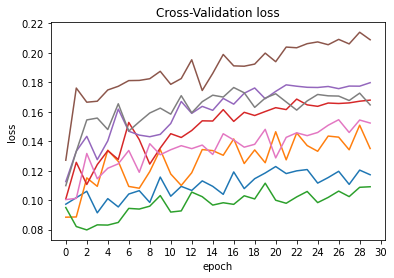

In [11]:
#plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['val_loss'])
plt.plot(history_5.history['val_loss'])
plt.plot(history_6.history['val_loss'])
plt.plot(history_7.history['val_loss'])
plt.plot(history_8.history['val_loss'])
plt.plot(history_9.history['val_loss'])
plt.title('Cross-Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#lgd=plt.legend(['lr=0.01','lr=0.001','lr=0.0001','lr scheduler_5','lr scheduler_10','lr scheduler_15','lr scheduler_20', 'adam'], loc='upper right')
#plt.xlim(0.0,)
#plt.ylim(0.06,0.25)
plt.xticks(np.arange(0.0, 31, 2))
#plt.yticks(np.arange(0.06, 0.25, 0.02))
plt.savefig('Validation_Loss_for_lr_hex_9p.png', dpi=1200)
plt.show()



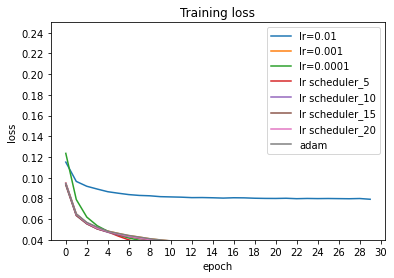

In [12]:
#plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_5.history['loss'])
plt.plot(history_6.history['loss'])
plt.plot(history_7.history['loss'])
plt.plot(history_8.history['loss'])
plt.plot(history_9.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['lr=0.01','lr=0.001','lr=0.0001','lr scheduler_5','lr scheduler_10','lr scheduler_15','lr scheduler_20','adam'], loc='upper right')
#plt.xlim(0.0,)
plt.ylim(0.04,0.25)
plt.xticks(np.arange(0.0, 31, 2))
plt.yticks(np.arange(0.04, 0.25, 0.02))
plt.savefig('Training_Loss_for_lr_hex_9p.png', dpi=1200)
plt.show()

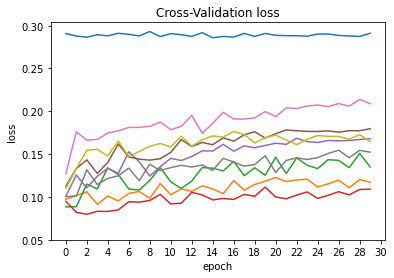

In [13]:
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['val_loss'])
plt.plot(history_5.history['val_loss'])
plt.plot(history_6.history['val_loss'])
plt.plot(history_7.history['val_loss'])
plt.plot(history_8.history['val_loss'])
plt.plot(history_9.history['val_loss'])
plt.title('Cross-Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['lr=0.1','lr=0.01','lr=0.001','lr=0.0001','lr scheduler_5','lr scheduler_10','lr scheduler_15','lr scheduler_20', 'adam'], loc='upper right')
#plt.xlim(0.0,)
plt.ylim(0.05,)
plt.xticks(np.arange(0.0, 31, 2))
#plt.yticks(np.arange(0.05, 0.31, 0.05))
plt.savefig('Validation_Loss_for_lr_1_hex_9p.png', dpi=1200)
plt.show()



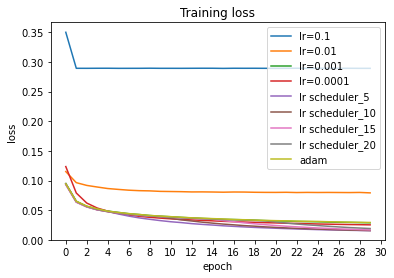

In [14]:
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_5.history['loss'])
plt.plot(history_6.history['loss'])
plt.plot(history_7.history['loss'])
plt.plot(history_8.history['loss'])
plt.plot(history_9.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['lr=0.1','lr=0.01','lr=0.001','lr=0.0001','lr scheduler_5','lr scheduler_10','lr scheduler_15','lr scheduler_20','adam'], loc='upper right')
#plt.xlim(0.0,)
plt.ylim(0.0,)
plt.xticks(np.arange(0.0, 31, 2))
#plt.yticks(np.arange(0.0, 0.25, 0.02))
plt.savefig('Training_Loss_for_lr_1_hex_9p.png', dpi=1200)
plt.show()